# Graficos con Pandas
Raul Marusca (raulrm@gmail.com)  


Vamos a ver como producir unos graficos simples empleando las opciones de graficacion incorporadas en el paquete *Pandas*  
Para empezar, configuremos nuestro entorno. Recordemos que estamos usando jupyter Notebook (o Jupyter Lab o Google Colab)  
Carguemos la libreria Pandas y numpy, de la forma estandard: 

In [1]:
import pandas as pd
import numpy as np

Ahora ajustemos el formato de salida grafica para que sea rapidamente visible y no nos aparezcan codigos "extraños"  
Para eso usamos los *comandos magicos* de Jupyter Notebook.  
Y el truco de poner punto y coma (semicolon ; ) al final de la linea donde presentemos nuestro grafico


In [3]:
%matplotlib inline  

### Graficos de lineas  
Vamos a comenzar con los graficos mas sencillos que podemos hacer con Pandas, el grafico de lineas.  
Pero primero definamos los datos con los que vamos a trabajar. Que serian los ingresos y gastos anuales de un programador :)  
En nuestro grafico de lineas vamos a poner en las absisas (eje x) vamos a poner los años que estamos considerando y en las ordenadas (eje y) los ingresos y egresos.  
Graficaremos los ingresos creando dos listas, una para las x y otra para las y.  


In [4]:
# en el eje x van los años
x = [2001, 2002, 2003, 2004, 2005, 2006]
# y en el eje y los ingresos
y = [4, 11, 12, 9, 10, 8]

Para usar Pandas convertimos esas listas a un dataframe que se va a llamar grafico.  
Como vemos usamos el metodo .DataFrame que requiere dos argumentos. Que en esta ocasion iran al reves de lo que la logica indica y primero seran las ordenada (y) y luego las absisas (x)

In [5]:
datos = pd.DataFrame(y, x)

Asi se ve este dataframe

In [6]:
datos

,0
2001,4
2002,11
2003,12
2004,9
2005,10
2006,8


Con esta estructura es suficiente para poder hacer un grafic minimo.  
El grafico en si se genera con el metodo .plot que requiere un parametro que le indique cual va a ser el tipo de grafico a generar.  
El atributo *kind*  es el que nos define eso. Por el momento vamos a ver como hacer del tipo de **linea** asi que entonces kind = 'line' (entre comillas porque es un string)  
si lo ejectamos veremos el grafico mas simple de todos pero, aun asi, bastante funcional.  

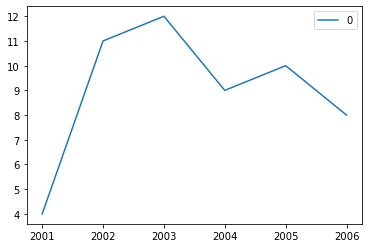

In [7]:
datos.plot(kind = 'line');

Automagicamente, .plot ya nos agrega una leyenda que se basa en el nombre de la columna del dataframe. Como por ahora para nosotros esa columna es la 0, asi aparecera en el grafico.  
Esto se puede arreglar haciendo que y en vez de ser una lista sea un diccionario cuyo *key* sea el nombre que queremos que tenga la linea y cuyo valor sea la lista de los ingresos.  
Podemos hacer otra sencilla mejora agregandole la grilla, eso se hace con un nuevo parametro *grid = True*  
Vamos a dejar en cada bloque de codigo todo lo necesario para poder realizar el grafico, asi que veremos muchas cosas repetidas de ahora en mas.  

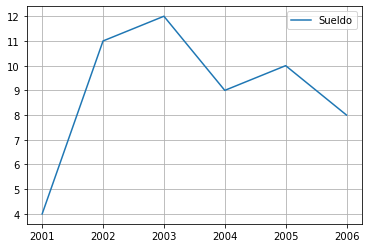

In [8]:
# En x van los años
x = [2001, 2002, 2003, 2004, 2005, 2006]
# En y va a ir un diccionario con el nombre de la linea enn key y los valores en value
y = {'Sueldo' : [4, 11, 12, 9, 10, 8]}

# Creamos el dataframe
datos = pd.DataFrame(y, x)

# Lo dibujamos
datos.plot(kind = 'line', 
           grid = True);

Seguimos mejorando el grafico agregandole un titulo descriptivo usando el argumento * title* 

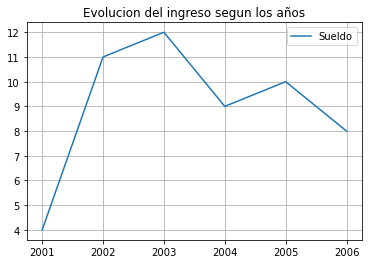

In [9]:
# En x van los años
x = [2001, 2002, 2003, 2004, 2005, 2006]
# En y va a ir un diccionario con el nombre de la linea enn key y los valores en value
y = {'Sueldo' : [4, 11, 12, 9, 10, 8]}

# Creamos el dataframe
datos = pd.DataFrame(y, x)

# Lo dibujamos
datos.plot(kind = 'line', 
            grid = True,
            title = 'Evolucion del ingreso segun los años');

Podemos ponerle etiquetas a los ejes empleando los atributos *xlabel* y *ylabel*  
**Atencion** esto no funciona asi en todas las versiones de Pandas. Aqui estamos usando la 1.4.2

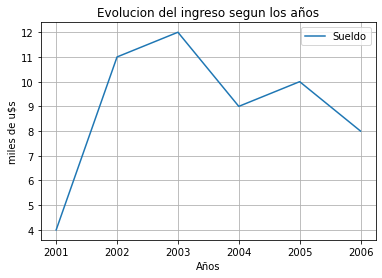

In [10]:
# En x van los años
x = [2001, 2002, 2003, 2004, 2005, 2006]
# En y va a ir un diccionario con el nombre de la linea enn key y los valores en value
y = {'Sueldo' : [4, 11, 12, 9, 10, 8]}

# Creamos el dataframe
datos = pd.DataFrame(y, x)

# Lo dibujamos
datos.plot(kind = 'line', 
            grid = True,
            title = 'Evolucion del ingreso segun los años', 
            ylabel = 'miles de u$s',
            xlabel = 'Años');


Podemos apreciar que el graficose extiende tanto a derecha e izquierda como por debajo y arriba de nuestros datos.  
Eso se corrige con los parametros *xlim* y *ylim* que como valor reciben un *set* con los valores minimos y maximos que va a recorrer ese eje.  
Aprovechamos para empezar nuestro grafico desde 0 u$s en las ordenadas.

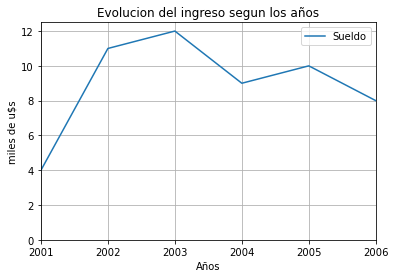

In [11]:
# En x van los años
x = [2001, 2002, 2003, 2004, 2005, 2006]
# En y va a ir un diccionario con el nombre de la linea enn key y los valores en value
y = {'Sueldo' : [4, 11, 12, 9, 10, 8]}

# Creamos el dataframe
datos = pd.DataFrame(y, x)

# Lo dibujamos
datos.plot(kind = 'line', 
            grid = True,
            title = 'Evolucion del ingreso segun los años', 
            ylabel = 'miles de u$s',
            xlabel = 'Años', 
            xlim = (2001,2006),
            ylim = (0,12.5));

Supongamos que ahora queremos graficar tambien como evolucionaron nuestros gastos en esos mismos años. Y lo queremos ver en el mismo grafico.  
Para ello, le agregamos un nuevo par key:value al diccionario con clave 'Gastos' y valor, la lista de los gastos anuales

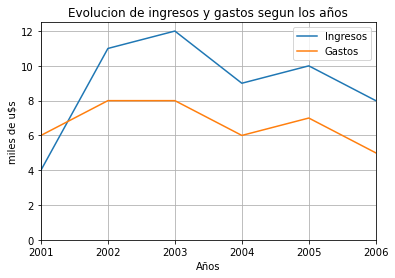

In [12]:
x = [2001, 2002, 2003, 2004, 2005, 2006]
y = {'Ingresos' : [4, 11, 12, 9, 10, 8], 'Gastos' : [6, 8, 8, 6, 7, 5]}

datos = pd.DataFrame(y, x)

datos.plot(kind = 'line', 
            grid = True,
            title = 'Evolucion de ingresos y gastos segun los años', 
            ylabel = 'miles de u$s',
            xlabel = 'Años',
            xlim = (2001,2006),
            ylim = (0,12.5));

Vamos a ordenar un poco nuestro codigo para los futuros ejemplos y vamos a asignarlo a un objeto. Este sera un objeto matplotlib 

## Barras
Crear graficos de barras es practicamente lo mismo que hacerlo con lineas, veamos que pasamos de uno al otro solo reemplazando el valor de *kind*. todas las demas funcionalidades son las misma.


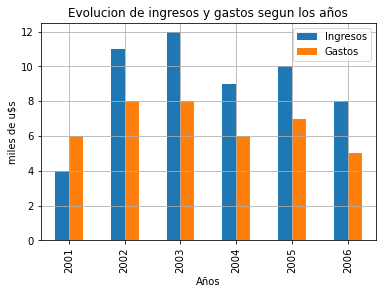

In [13]:
x = [2001, 2002, 2003, 2004, 2005, 2006]
y = {'Ingresos' : [4, 11, 12, 9, 10, 8], 'Gastos' : [6, 8, 8, 6, 7, 5]}

datos = pd.DataFrame(y, x)

datos.plot(kind = 'bar', 
            grid = True,
            title = 'Evolucion de ingresos y gastos segun los años', 
            ylabel = 'miles de u$s',
            xlabel = 'Años',
            xlim = (2001,2006),
            ylim = (0,12.5));

Podemos *apilar* las barras usando el argumento *stacked* Por el nuevo cambio en altura al sumar las barras de ingresos y gastos vamos a eliminar los limites en el eje y 

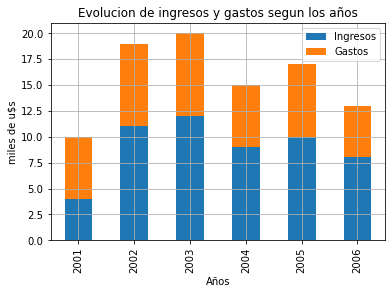

In [14]:
x = [2001, 2002, 2003, 2004, 2005, 2006]
y = {'Ingresos' : [4, 11, 12, 9, 10, 8], 'Gastos' : [6, 8, 8, 6, 7, 5]}

datos = pd.DataFrame(y, x)

datos.plot(kind = 'bar',
           grid = True,
           stacked = True,
           title = 'Evolucion de ingresos y gastos segun los años',
           ylabel = 'miles de u$s',
           xlabel = 'Años',
           xlim = (2001, 2006));

Este grafico no tiene mucho sentido, pero es solo para demostrar lo que se puede hacer con .plot  
  
Tambien podemos realizar este mismo grafico, pero con barras horizontales usando el *kind=barh* e 

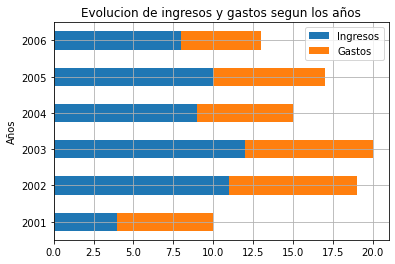

In [15]:
x = [2001, 2002, 2003, 2004, 2005, 2006]
y = {'Ingresos' : [4, 11, 12, 9, 10, 8], 'Gastos' : [6, 8, 8, 6, 7, 5]}

datos = pd.DataFrame(y, x)

datos.plot(kind = 'barh',
           grid = True,
           stacked = True,
           title = 'Evolucion de ingresos y gastos segun los años',
           ylabel = 'miles de u$s',
           xlabel = 'Años');

La version de Pandas que estoy usando (1.4.2) tiene un bug con *ylabel* por eso no podemos ver esa etiqueta.  
MAs adelante en este documento veremos que hay una forma de coregir eso.

## Histograma
Con Pandas podemos tambien hacer histogramas. Pero para este tipo de graficos no podemos seguir usando los datos de ingresos y egresos, ya que demos tener muchos mas puntos (e incluso algunas repeticiones)  
Asi que vamos emplear una lista con las alturas en centimetros de algunas personas.  
Pero vamos a ahorrarnos trabajo creando esos valores usando las herramientas estadisticas que provee numpy y los "inventaremos" a partir de los valores promedio y la desviacion estandard.  

In [16]:
# promedio mujeres
mu = 169 
# Desviacion estandar mujeres
sigma = 5 
# Cantidad
cantidad = 250
# iniciamos el generador azaroso
np.random.seed(0)
# Generamos los datos como valores enteros
altura_femenino = np.random.normal(mu, sigma, cantidad).astype(int)

# Promedio varones
mu = 176 
# Desviacion estandard varones
sigma = 6
# Cantidad
sample = 250
# Iniciamos el generador azaroso (con otro valor)
np.random.seed(1)
# Generamos los datos como valores enteros
altura_masculino = np.random.normal(mu, sigma, cantidad).astype(int)

Veamos como son los valores generados

In [17]:
altura_femenino

array([177, 171, 173, 180, 178, 164, 173, 168, 168, 171, 169, 176, 172,
       169, 171, 170, 176, 167, 170, 164, 156, 172, 173, 165, 180, 161,
       169, 168, 176, 176, 169, 170, 164, 159, 167, 169, 175, 175, 167,
       167, 163, 161, 160, 178, 166, 166, 162, 172, 160, 167, 164, 170,
       166, 163, 168, 171, 169, 170, 165, 167, 165, 167, 164, 160, 169,
       166, 160, 171, 164, 169, 172, 169, 174, 162, 171, 165, 164, 166,
       167, 169, 163, 173, 171, 161, 176, 178, 174, 168, 163, 174, 166,
       175, 170, 173, 170, 172, 169, 177, 169, 171, 178, 162, 162, 173,
       163, 178, 166, 165, 178, 176, 178, 173, 164, 178, 167, 173, 173,
       168, 172, 173, 170, 163, 170, 175, 165, 168, 166, 178, 172, 171,
       165, 171, 165, 169, 165, 172, 171, 167, 170, 163, 161, 171, 169,
       172, 180, 173, 164, 174, 162, 166, 168, 177, 165, 164, 168, 165,
       174, 163, 163, 166, 166, 178, 173, 169, 162, 173, 163, 161, 174,
       170, 173, 170, 173, 165, 163, 172, 164, 165, 166, 169, 16

In [18]:
altura_masculino

array([185, 172, 172, 169, 181, 162, 186, 171, 177, 174, 184, 163, 174,
       173, 182, 169, 174, 170, 176, 179, 169, 182, 181, 179, 181, 171,
       175, 170, 174, 179, 171, 173, 171, 170, 171, 175, 169, 177, 185,
       180, 174, 170, 171, 186, 176, 172, 177, 188, 176, 179, 177, 173,
       169, 173, 174, 179, 181, 181, 177, 181, 171, 183, 179, 174, 178,
       175, 182, 185, 189, 167, 167, 172, 176, 181, 177, 163, 174, 180,
       177, 180, 174, 174, 177, 178, 177, 176, 171, 178, 176, 182, 183,
       177, 173, 172, 178, 176, 173, 176, 172, 180, 173, 183, 178, 179,
       169, 177, 180, 170, 174, 176, 167, 177, 181, 170, 178, 168, 175,
       166, 182, 178, 175, 171, 183, 187, 164, 183, 185, 178, 168, 181,
       174, 172, 168, 179, 180, 172, 179, 169, 180, 176, 174, 175, 181,
       180, 179, 176, 176, 179, 177, 180, 174, 161, 182, 189, 178, 175,
       175, 175, 176, 169, 172, 170, 177, 174, 178, 174, 181, 177, 189,
       164, 172, 181, 191, 174, 176, 174, 183, 174, 180, 174, 16

Unimos los valores generados en un dtaframe Pandas.  
Recordemos que para que tengan nombre las columnas debemos crear primero un *diccionario*  

In [19]:
alturas = pd.DataFrame({'mujeres': altura_femenino, 'varones': altura_masculino})
alturas

,mujeres,varones
0,177,185
1,171,172
2,173,172
3,180,169
4,178,181
...,...,...
245,160,180
246,174,179
247,174,173
248,164,186


El grafico mas sencillo que podemos hacer es bastante feo. Usamos el atributo *kind = 'hist'*  

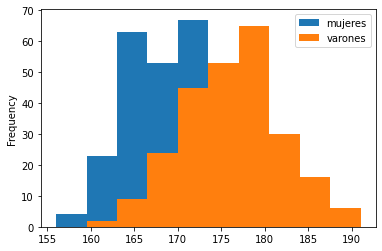

In [20]:
alturas.plot(kind='hist');

**Nota** Como los histogramas son muy usados, Pandas tiene un *atajo* que es *dataframe.hist()*  
Que separa cada columna en su propio grafico (con ciertas limitaciones...)

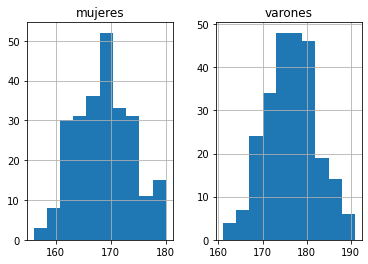

In [21]:
alturas.hist();

Bueno pero ¿que pasa si solo queremos graficar el histograma de las alturas masculinas?  
Aprovechemos de paso para que haya una *grilla* visible y que haya 20 barras. 

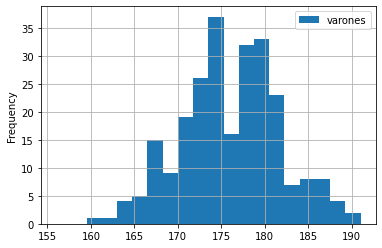

In [22]:
alturas.plot(kind = 'hist', 
             grid = True,
             bins = 20,
             column = 'varones');

Bastante lindo, pero ¿por que ese *Frequency* como *ylabel*? Cambiemos eso y agreguemos un titulo usando las opciones que ya conocemos.  

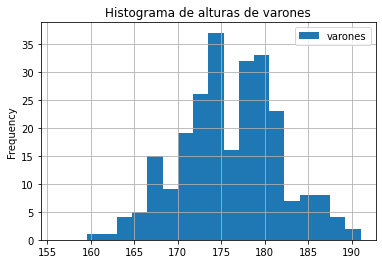

In [23]:
alturas.plot(kind = 'hist', 
            grid = True,
            bins = 20, 
            column = 'varones',
            ylabel = 'Frecuencia',
            xlabel = 'Centimetros',
            title = 'Histograma de alturas de varones');

Ok, nos estaria desobedeciendo un poco.  
Tambien nos sucedio algo similar con *kind = 'barh'*  
Esto no es porque Pandas sea cabezadura, si no porque las capacidades graficas de Pandas aun estan en desarrollo. Y por el momento Pandas usa por debajo el motor de matplotlib. Y lamentablemente aun no estan implementados todos los *wrappers* de las funciones de matplotlib.  
Podemos solventar eso entendiendo que Pandas nos devuelve un objeto matplotlib y luego nosotros podemos aplicar a ese objeto los metodos que nos interesan.  
Hagamos eso asignando el resultado de *dataframe.plot()* a un objeto y modifiquemos luego sus propiedades.  

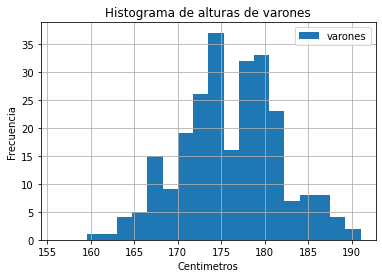

In [24]:
# obtenemos el objeto grafico
grafico = alturas.plot(kind = 'hist', 
            grid = True,
            bins = 20, 
            column = 'varones',
            title = 'Histograma de alturas de varones')
# Ahora apliquemos las propiedades que nos interesan
grafico.set_ylabel('Frecuencia')
grafico.set_xlabel('Centimetros');

Podemos mejorar un poco el grafico original donde teniamos superpuestas ambos grupos de altura empleando el switch *alpha* para darle cierta transparencia a los valores de cada grupo.

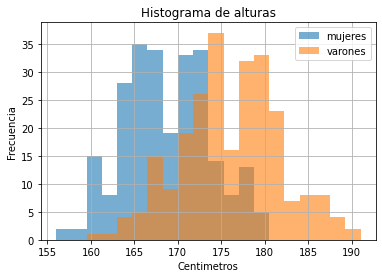

In [25]:
# obtenemos el objeto grafico
grafico = alturas.plot(kind = 'hist', 
            grid = True,
            bins = 20, 
            title = 'Histograma de alturas',
            alpha = 0.6)
# Ahora apliquemos las propiedades que nos interesan
grafico.set_ylabel('Frecuencia')
grafico.set_xlabel('Centimetros');

Podemos hacer un *seudo-histograma* usando *kind = 'bar'* usando las funciones de DataFrame *group_by()* y *count()*  
Pero requeriria un poco mas de trabajo en los valores que aparecen en las ordenadas (por lo general no son valores enteros)  
matplotlib tiene los parametros *xticks* y *yticks* para eso

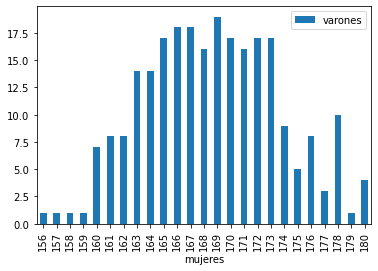

In [26]:
alturas.groupby('mujeres').count().plot(kind = 'bar');

## BoxPlot
Vamos a usar el mismo dataframe de las alturas para hacer un grafico de cajas (BoxPlot)  
El mas sencillo es: 

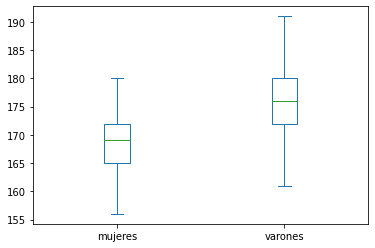

In [27]:
alturas.plot(kind='box');

Se podria decir que es bastante completo. Quizas lo podemos mejorar agregandole el titulo y una etiqueta a las ordenadas

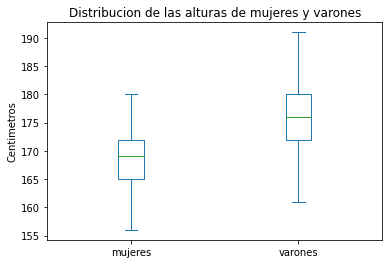

In [28]:
alturas.plot(kind='box',
            ylabel = 'Centimetros',
            title = 'Distribucion de las alturas de mujeres y varones');

En el caso de que tengamos mas columnas (nosotros solo tenemos varones y mujeres) podemos elegir cuales mostrar pasandole al parametro *column* una lista con las columnas a comparar.  
O podemos usar esa lista para cambiar el orden en el que aparecen.  
Aprovechemos este ejemplo para agregar una grilla y una etiqueta la eje de las absisas. Pero para eso ultimo debemos volver al sistema de usar el objeto matplotlib.

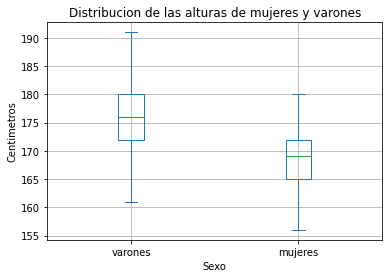

In [29]:
grafico = alturas.plot(kind='box',
            grid = True,
            ylabel = 'Centimetros',
            title = 'Distribucion de las alturas de mujeres y varones',
            column = ['varones', 'mujeres'])
grafico.set_xlabel('Sexo');

## Area
Este *kind* nos permite graficar valores acumulados y es su funcionamiento por defecto. Supongamos, volviendo al dataset de ingresos y egresos, que tenemos distintas fuentes de ingreso y queremos ver como es su evolucion en el tiempo de forma grafica.

In [30]:
# en el eje x van los años
x = [2001, 2002, 2003, 2004, 2005, 2006]
# y tenemos distintos ingresos
trabajo = [4, 11, 12, 9, 10, 8]
inversiones = [1, 1.5, 2.5, 2.5, 3.5, 3]
freelance = [2, 4, 10, 6, 10, 11]
youtube = [1, 1.1, 1.2, 0.9, 1.4, 1.8]

# Creamos el dataframa
ingresos = pd.DataFrame({'Sueldo' : trabajo, 'Inversiones' : inversiones, 'Freelancing' : freelance, 'Redes' : youtube}, x)
ingresos


,Sueldo,Inversiones,Freelancing,Redes
2001,4,1.0,2,1.0
2002,11,1.5,4,1.1
2003,12,2.5,10,1.2
2004,9,2.5,6,0.9
2005,10,3.5,10,1.4
2006,8,3.0,11,1.8


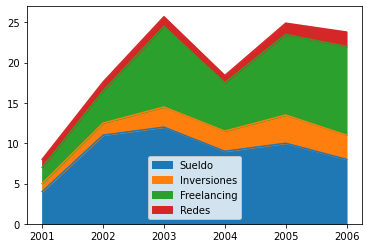

In [31]:
ingresos.plot(kind = 'area');

Le agregamos toda la parafernalia ya conocida.

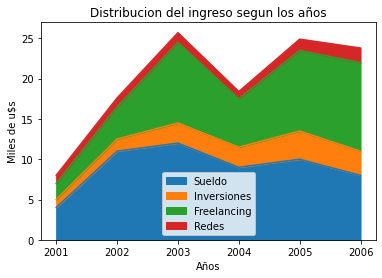

In [32]:
ingresos.plot(kind = 'area',
             title = 'Distribucion del ingreso segun los años',
             ylabel = 'Miles de u$s',
             xlabel = 'Años');

Podemos hacer que los graficos de area no esten apilados, aunque eso no queda muy bien...  
Podemos tambien cambiar la transparencia con el parametro *alpha*  
Vemos que la leyenda se acomoda automaticamente para no interrumpir el grafico (esta posicion se puede cambiar trabajando con el objeto matplotlib)

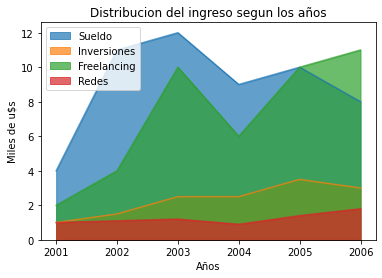

In [45]:
ingresos.plot(kind = 'area',
             title = 'Distribucion del ingreso segun los años',
             ylabel = 'Miles de u$s',
             xlabel = 'Años',
             stacked = False,
             alpha = 0.7);

## Torta
Tambien podemos hager graficos de torta con el *kind = 'pie'*  
Vamos a crear un dataframe que nos sea util para hacer estas representaciones.  
Aprovechamos tambien para emplear las funciones de agrupamiento y suma de Pandas

In [46]:
# Creamos nuestros equipos
equipos = ['A','A','A', 'B', 'B','B', 'C','C','C', 'D', 'D', 'D']
# Y los goles que hicieron durante los partidos
goles = [ 4, 2, 0, 3, 3, 2, 1,1,0, 2, 4, 0 ]

# Ahora creamos el dataframe
resultados = pd.DataFrame({'equipos' : equipos, 'goles' : goles})
resultados

,equipos,goles
0,A,4
1,A,2
2,A,0
3,B,3
4,B,3
5,B,2
6,C,1
7,C,1
8,C,0
9,D,2


Entonces agrupamos los resultados por equipo, los sumamos y le pasamos esa info al *pie* para que grafique los goles totales por equipo

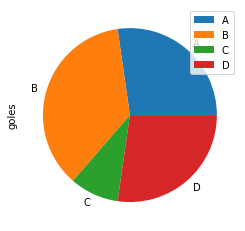

In [47]:
resultados.groupby(['equipos']).sum().plot(kind = 'pie', y = 'goles');

Es un grafico bastante soso. Vamos a hacer que sea mas informativo.  
Tendra un titulo y una etiqueta lateral.  
Para mas datos usaremos *autopc* nos calcula el porcentaje del total que representa cada porcion.

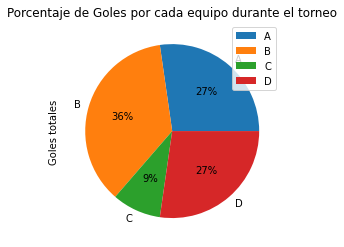

In [50]:
resultados.groupby(['equipos']).sum().plot(kind = 'pie', 
                                          y = 'goles',
                                          autopct = '%1.0f%%',
                                          title = 'Porcentaje de Goles por cada equipo durante el torneo',
                                          ylabel = 'Goles totales');

Si queremos cambiar el color de cada porcion, podemos definir una lista de colores que seran aplicados a cada una de ellas en el orden que aparecen, veamos como:

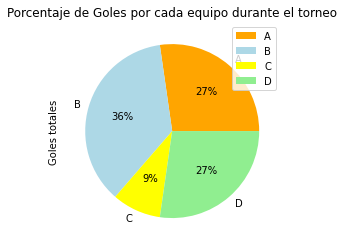

In [55]:
# Definimos unan lista con los colores de cada equipo
colores = ['orange', 'lightblue', 'yellow', 'lightgreen']

# Y ahora lo aplicamos
resultados.groupby(['equipos']).sum().plot(kind = 'pie', 
                                          y = 'goles',
                                          autopct = '%1.0f%%',
                                          title = 'Porcentaje de Goles por cada equipo durante el torneo',
                                          ylabel = 'Goles totales',
                                          colors = colores);

## ScaterPlot
Tambien podemos obtener un grafico de puntos dispersos a partir de un DataFrame Pandas. El mas sencillo es

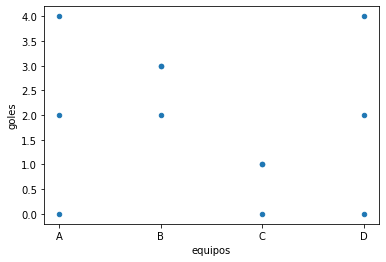

In [58]:
resultados.plot(kind = 'scatter', y = 'goles', x = 'equipos');

Que viene a ser otro grafico feo pero pero funcional. Podemos ver que *kin = 'scatter'* requiere que indiquemos exactamente que columnas corresponden a absisas y ordenadas. 
Y tambien ya pone los nombres en esos ejes a partir del nombre de las columnas.  
Podemos editar eso con las opciones ya conocidas.

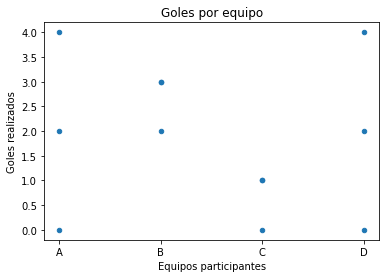

In [63]:
resultados.plot(kind = 'scatter', 
                y = 'goles', 
                x = 'equipos',
                title = 'Goles por equipo',
                xlabel = 'Equipos participantes',
                ylabel = 'Goles realizados');

Podemos tambien cambiar el tamaño de los puntos y su color

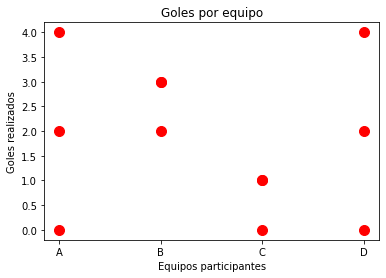

In [64]:
resultados.plot(kind = 'scatter', 
                y = 'goles', 
                x = 'equipos',
                title = 'Goles por equipo',
                xlabel = 'Equipos participantes',
                ylabel = 'Goles realizados',
                s = 100,
                c = 'red');

El parametros *s* (size) puede ser asignado a otro valor (otra columna) y entonces podremos incorporar una informacion xtra en nuestro grafico de puntos dispersos.

## HexBin
Hexbin es un grafico del tipo scatterplot pero con celdas de forma exagonal, que nos sirve para representar informacion  numerica en amdos ejes.  
Vamos a preparar los datos primero. Haremos una generacion al azar y compararemos los graficos hexbin con los scatter.  


In [75]:
# Generaremos 100 puntos
n = 1000
# en el eje x hacemos una distribucion normal
x = np.random.standard_normal(n)
# y en el eje y le aplicamos una funcion de x
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
# Con estos dos eje formamos el dataframe
df = pd.DataFrame({'x': x, 'y' : y})
# Vemos que quedo
df

,x,y
0,0.628438,1.198233
1,-1.330872,-3.175059
2,0.680251,2.040308
3,-0.400808,-0.745662
4,-1.341353,-0.711242
...,...,...
995,0.332847,0.605517
996,-0.107397,4.712551
997,-1.157374,-0.990615
998,-0.506489,2.262860


Graficamos este data set con scatterplot para ver como queda

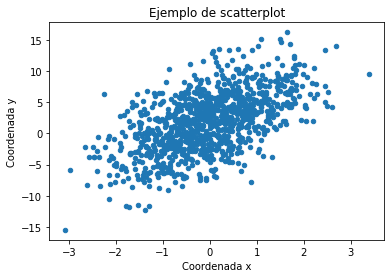

In [80]:
df.plot(kind = 'scatter', 
                y = 'y', 
                x = 'x',
                title = 'Ejemplo de scatterplot',
                xlabel = 'Coordenada x',
                ylabel = 'Coordenada y');

**SABEMOS** que los puntos del medio de la figura son mas de los que vemos, pero scatterplot no nos permite ver la *densidad* de puntos en un lugar del grafico.  
Es aqui donde nos conviene usar *kind = 'hexbin'* Lo vamos a emplear con un tamaño de grilla (*gridsize*) grande para apreciar que es un exagono.

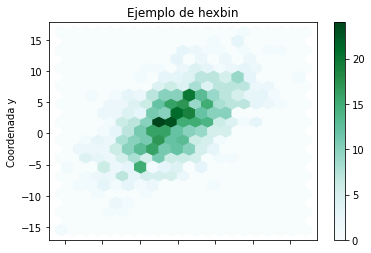

In [81]:
df.plot(kind = 'hexbin', 
                y = 'y', 
                x = 'x',
                title = 'Ejemplo de hexbin',
                xlabel = 'Coordenada x',
                ylabel = 'Coordenada y',
                gridsize = 20);

Esto nos resulta mas informativo.  
Vemos que seguimos teniendo el problema (aun no corregido) de la etiqueta en el eje x y que solo podemos ver los exagonos en colores verdosos. Para este *kind* Pandas tiene una forma distinta de asignar colores que es a traves de un mapeo a una secuencia de colores con el parametros *cmap*

## KDE y density
Pandas tiene otros formatos graficos que se apoyan en funciones estadisticas de la libreria scipy, asi que no los incluiremos en este resumen.  
  
## Resumen final
Esta guia fue realizada por mi para mi. La idea es tener en un solo documento referencias y ejemplos para graficar a partir de dataframes Pandas. Posiblemente en el futuro la extienda con mas ejemplos y mas formas de uso, mientras tanto la dejo disponible para quien quiera usarla y si es posible, ampliarla.  

Raul Marusca raulrm@gmail.com Agosto 2022
